## Auto-Generated Knowledge Graphs

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!git clone https://github.com/huggingface/neuralcoref.git
!pip install -U spacy
!python -m spacy download en
import spacy
nlp = spacy.load('en')

%cd neuralcoref

!pip install -r requirements.txt
!pip install -e .

import neuralcoref
neuralcoref.add_to_pipe(nlp)
!pip install wikipedia-api
!pip install spacy==2.2.2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
fatal: destination path 'neuralcoref' already exists and is not an empty directory.
  Using cached https://files.pythonhosted.org/packages/31/c7/e66e2af1cfa418c3a3917c116c4e00ccffa546f18f59e6acd7953d833c5c/spacy-2.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/10/ae/ef3ae5e93639c0ef8e3eb32e3c18341e511b3c515fcfc603f4b808087651/thinc-7.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: thinc 7.3.1
    Uninstalling thinc-7.3.1:
      Successfully uninstalled thinc-7.3.1
  Found existing installation: spacy 2.2.2
    Uninstalling spacy-2.2.2:
      Successfully uninstalled spacy-2.2.2
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/sp

Obtaining file:///content/neuralcoref
  Found existing installation: neuralcoref 4.0
    Can't uninstall 'neuralcoref'. No files were found to uninstall.
  Running setup.py develop for neuralcoref


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 112 from PyObject
  return f(*args, **kwds)


  Using cached https://files.pythonhosted.org/packages/b9/05/e82c888a36f24608664b56abe737f4428410d370791f6112fb3e9b4a4a81/spacy-2.2.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/07/59/6bb553bc9a5f072d3cd479fc939fea0f6f682892f1f5cff98de5c9b615bb/thinc-7.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/6b/e07fad36913879757c90ba03d6fb7f406f7279e11dcefc105ee562de63ea/preshed-3.0.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/19/f95c75562d18eb27219df3a3590b911e78d131b68466ad79fdf5847eaac4/blis-0.4.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: en-core-web-sm 2.3.0 has requirement spacy<2.4.0,>=2.3.0, but you'll have spacy 2.2.2 which is incompatible.
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uni

### Example:

Part of Speech tags and dependencies

In [2]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


Named Entities

In [3]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


Vocab, hashes, lexemes

In [4]:
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

3197928453018144401
coffee


In [5]:
list(doc.vocab.strings)[:10]

['""', '#', '$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD']

### Importing required libraries

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')
import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
#import neuralcoref
#neuralcoref.add_to_pipe(nlp)
import wikipediaapi

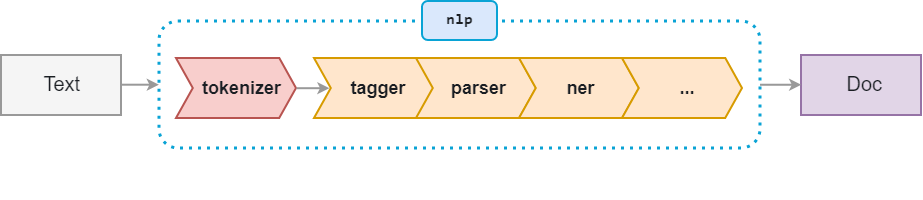

Reading in data, link using page name and listing categories based on key objects in the text. Using Wikipedia API for webscraping

In [7]:
wiki_api = wikipediaapi.Wikipedia(language='en')
page_name = wiki_api.page('Data_science')
page_data = {'page':page_name, 'text':page_name.text, 'link':page_name.fullurl,'categories': [[y[9:] for y in list(page_name.categories.keys())]]}
print(page_data)

{'page': Data science (id: 35458904, ns: 0), 'text': 'Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, deep learning and big data.\nData science is a "concept to unify statistics, data analysis, machine learning, domain knowledge and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.\n\nFoundations\nData science is an interdisciplinary field focused o

Input dataframe:

In [8]:
page_data_df = pd.DataFrame(page_data)
page_data_df

,page,text,link,categories
0,"Data science (id: 35458904, ns: 0)",Data science is an inter-disciplinary field th...,https://en.wikipedia.org/wiki/Data_science,[All lists having no precise inclusion criteri...


### P-O-S Tagging function

In [9]:
def refine_ent(ent, sent):
    unwanted_tokens = (
        'PRON',  # pronouns
        'PART',  # particle
        'DET',  # determiner
        'SCONJ',  # subordinating conjunction
        'PUNCT',  # punctuation
        'SYM',  # symbol
        'X',  # other
        )
    ent_type = ent.ent_type_  # get entity type
    if ent_type == '':
        ent_type = 'NOUN_CHUNK'
        ent = ' '.join(str(t.text) for t in nlp(str(ent)) if t.pos_ not in unwanted_tokens and t.is_stop == False)
    elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
        t = ''
        for i in range(len(sent) - ent.i):
            if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                t += ' ' + str(ent.nbor(i))
            else:
                ent = t.strip()
                break
    return ent, ent_type

### Rule-based matching

In [10]:
text = page_data_df.loc[0,'text']
text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
text = nlp(text)
text._.coref_resolved

''

In [11]:
print(text.ents)

(Jim Gray,
 fourth,
 Statistician Nathan Yau,
 Ben Fry,
 2015,
 the American Statistical Association,
 three,
 Nate Silver,
 Vasant Dhar,
 Andrew Gelman,
 Columbia University,
 Vincent Granville,
 Stanford,
 David Donoho,
 .In,
 1962,
 John Tukey,
 1992,
 the University of Montpellier II,
 1974,
 Peter Naur,
 1996,
 the International Federation of Classification Societies,
 first,
 1997,
 C.F. Jeff Wu,
 1998,
 Chikio Hayashi,
 three,
 the 1990s,
 William S. Cleveland,
 2001,
 the next few years,
 2002,
 the Committee on Data for Science and Technology,
 Data Science Journal,
 2003,
 Columbia University,
 The Journal of Data Science,
 2014,
 the American Statistical Association's,
 the Section on Statistical Learning and Data Science,
 DJ Patil,
 Jeff Hammerbacher,
 2008,
 the National Science Board,
 2005,
 Long-Lived Digital Data Collections: Enabling Research and Education,
 the 21st Century,
 third,
 America,
 2020,
 Glassdoor,
 one,
 2016-2019,
 first,
 PhD,
 $1.2 trillion,
 2020,


In [12]:
print(list(text.noun_chunks))

[Data science, an inter-disciplinary field, scientific methods, processes, algorithms, systems, knowledge, insights, many structural and unstructured data, Data science, data mining, deep learning, big data, Data science, a "concept, statistics, data analysis, machine learning, domain knowledge, their related methods, order, actual phenomena, data, It, techniques, theories, many fields, the context, mathematics, statistics, computer science, domain knowledge, information science, Turing award winner Jim Gray, data science, a "fourth paradigm, science, everything, science, the impact, information technology, the data deluge, Foundations, Data science, an interdisciplinary field, knowledge, data sets, big data, The field, analysis, data, analysis, findings, high-level decisions, an organization, it, skills, computer science, mathematics, statistics, information visualization, graphic design, business, Statistician Nathan Yau, Ben Fry, data science, human-computer interaction, users, data

The following code defines entity pairs as entities/noun chunks with subject — object dependencies connected by a root verb as a rule-of-thumb to produce different types of connections. This kind of connection can be referred to as a subject-predicate-object triple.

In [13]:
sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
#print(sentences)
ent_pairs = list()

In [19]:
for sent in sentences[:5]:
  sent = nlp(sent)
  print(list(sent.ents))
  print(list(sent.ents),list(sent.noun_chunks))
  spans = spacy.util.filter_spans(list(sent.ents)+list(sent.noun_chunks))
  print(spans)

[]
[] [Data science, an inter-disciplinary field, scientific methods, processes, algorithms, systems, knowledge, insights, many structural and unstructured data]
[Data science, an inter-disciplinary field, scientific methods, processes, algorithms, systems, knowledge, insights, many structural and unstructured data]
[]
[] [Data science, data mining, deep learning, big data]
[Data science, data mining, deep learning, big data]
[]
[] [Data science, a "concept, statistics, data analysis, machine learning, domain knowledge, their related methods, order, actual phenomena, data]
[Data science, a "concept, statistics, data analysis, machine learning, domain knowledge, their related methods, order, actual phenomena, data]
[]
[] [It, techniques, theories, many fields, the context, mathematics, statistics, computer science, domain knowledge, information science]
[It, techniques, theories, many fields, the context, mathematics, statistics, computer science, domain knowledge, information science]


### Dependency parsing: <br>Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

In [20]:
for sent in sentences:
  sent = nlp(sent)
  ## merge entities and noun chunks into one token
  spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
  spans = spacy.util.filter_spans(spans) #selects only the nodes
  with sent.retokenize() as retokenizer:
      [retokenizer.merge(span) for span in spans]  #merges entities and noun chunks
  dep = [token.dep_ for token in sent]
  #If subject/object found
  if (dep.count('obj')+dep.count('dobj'))==1 and (dep.count('subj')+dep.count('nsubj'))==1:
      for token in sent:
          if token.dep_ in ('obj', 'dobj'):  # identify object nodes
              subject = [w for w in token.head.lefts if w.dep_ in ('subj', 'nsubj')]  # identify subject nodes
              if subject:
                  subject = subject[0]
                  # identify relationship by root dependency
                  relation = [w for w in token.ancestors if w.dep_ == 'ROOT']  
                  if relation:
                      relation = relation[0]
                      # add adposition or particle to relationship
                      if relation.nbor(1).pos_ in ('ADP', 'PART'):  
                          relation = ' '.join((str(relation), str(relation.nbor(1))))
                  else:
                      relation = 'unknown'
                  subject, subject_type = refine_ent(subject, sent)
                  token, object_type = refine_ent(token, sent)
                  ent_pairs.append([str(subject), str(relation), str(token), str(subject_type), str(object_type)])

In [21]:
filtered_ent_pairs = [sublist for sublist in ent_pairs if not any(str(x) == '' for x in sublist)]
pairs = pd.DataFrame(filtered_ent_pairs, columns=['subject', 'relation', 'object', 'subject_type', 'object_type'])
print('Entity pairs extracted:', str(len(filtered_ent_pairs)))

Entity pairs extracted: 16


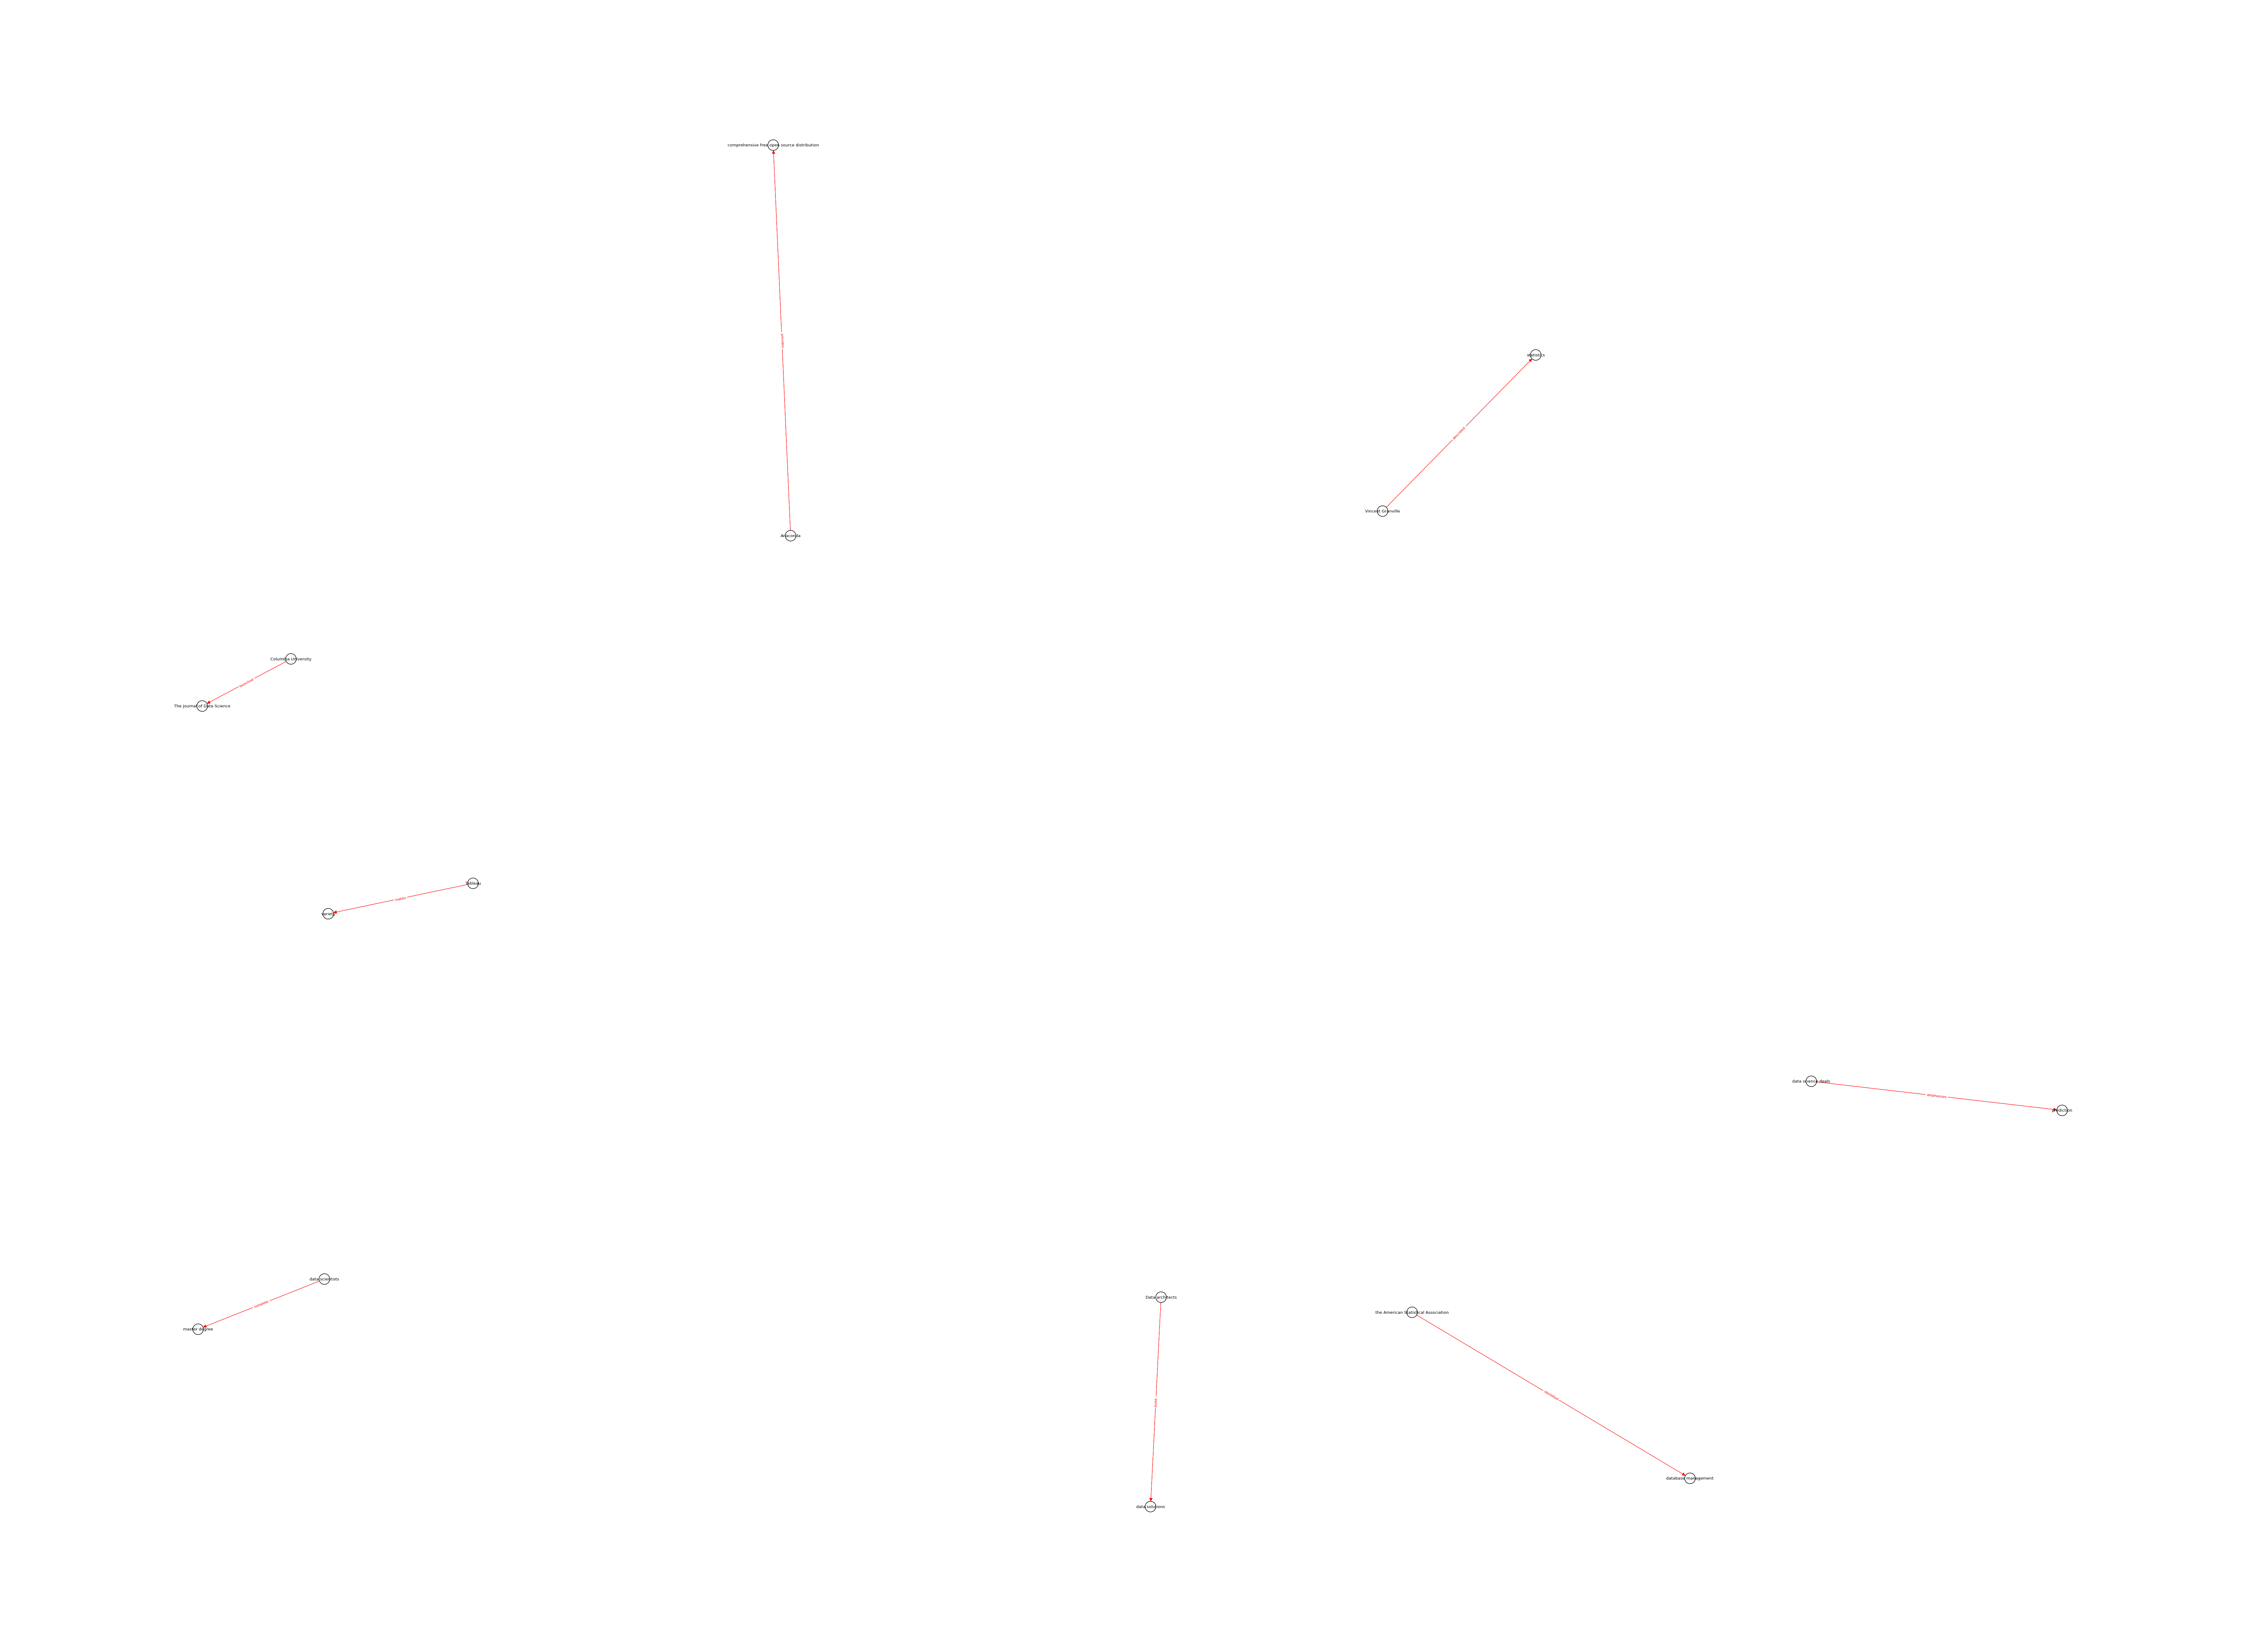

In [22]:
k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object', create_using=nx.MultiDiGraph())
node_deg = nx.degree(k_graph)
layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
plt.figure(num=None, figsize=(120, 90), dpi=80)

nx.draw_networkx(k_graph, node_size=[int(deg[1]) * 500 for deg in node_deg],
    arrowsize=20, linewidths=1.5, pos=layout,
    edge_color='red', edgecolors='black',node_color='white',
    )
labels = dict(zip(list(zip(pairs.subject, pairs.object)), pairs['relation'].tolist()))
nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels, font_color='red')

plt.axis('off')
plt.show()